<a href="https://colab.research.google.com/github/IzumiSatoshi/waifu-squarelizer/blob/main/waifu_squarelizer_shared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WAIFU SQUARELIZER 
repo : https://github.com/IzumiSatoshi/waifu-squarelizer  
The image in the input folder is cropped like this using facial recognition, and output to the output folder 
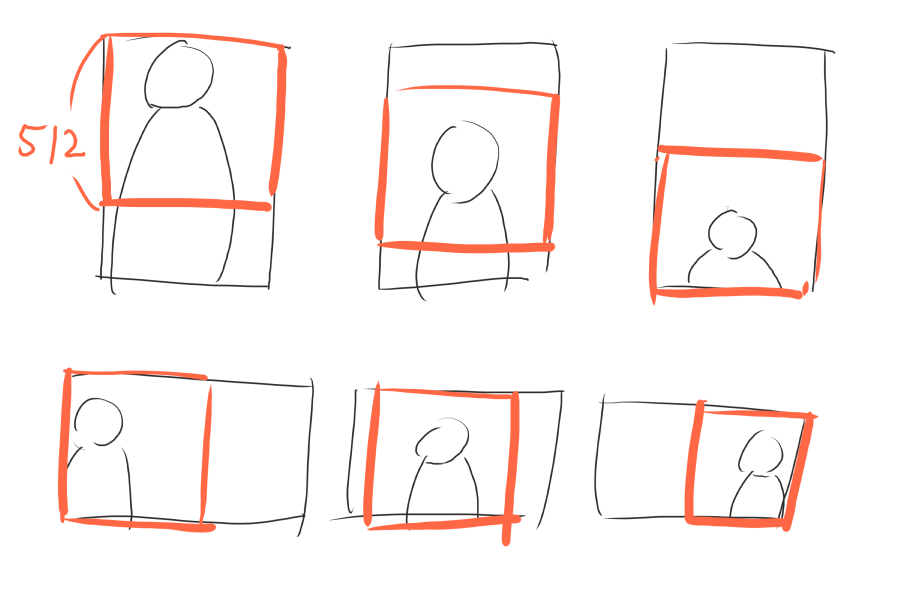

In [ ]:
# mount google drive if you want
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# installation
!pip install openmim
!mim install mmcv-full
!mim install mmdet
!mim install mmpose

!pip install anime-face-detector

In [ ]:
# imports
import cv2
from anime_face_detector import create_detector
from google.colab.patches import cv2_imshow
import glob
import os

In [ ]:
# load model
detector = create_detector('yolov3')

In [ ]:
# main
def squarelize(image):
  preds = detector(image)

  if len(preds) == 0:
    return None 

  left = preds[0]['bbox'][0]
  bottom = preds[0]['bbox'][1]
  right = preds[0]['bbox'][2]
  top = preds[0]['bbox'][3]
  x = int((left + right) / 2)
  y = int((top + bottom) / 2)
  height, width = image.shape[:2]
  sq_image = None
  if height > width:
    # portrait
    square_size = width
    if y < square_size / 2:
      sq_image = image[:square_size, :]    
    elif y < height - (square_size / 2):
      sq_image = image[int(y - square_size / 2):int(y + square_size / 2),:]
    else:
      sq_image = image[height - square_size:,:]
  else:
    # landscape
    square_size = height
    if x < square_size / 2:
      sq_image = image[:, :square_size]    
    elif x < width - (square_size / 2):
      sq_image = image[:, int(x - square_size / 2):int(x + square_size / 2)]
    else:
      sq_image = image[:, width - square_size:]
  
  return sq_image


input_dir = "/content/drive/MyDrive/test/input"#@param{type:"string"}
output_dir = "/content/drive/MyDrive/test/output"#@param{type:"string"}
output_extension = "jpg"#@param{type:"string"}

if not os.path.exists(output_dir):
  raise ValueError("output_dir is not exist")

paths = glob.glob(input_dir + "/*")
paths_len = len(paths)
for i, path in enumerate(paths):
  print(f"{i}/{paths_len} : {path}")
  basename = os.path.splitext(os.path.basename(path))[0]

  image = cv2.imread(path)
  sq_image = squarelize(image)
  
  # Skip if face does not exist
  if sq_image is None:
    print("Could not recognize the face in this image")
    continue

  sq_image = cv2.resize(sq_image, dsize=(512, 512))
  cv2.imwrite(f"{output_dir}/{basename}.{output_extension}", sq_image)

print("done. enjoy!")